<a href="https://colab.research.google.com/github/ZebraTechLabs/KaggleElo/blob/Dev/kaggleELOCompetition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()

{}

In [0]:
!pip install -q kaggle

In [1]:
kaggleText = '{\\"username\\":\\"raghavatal\\",\\"key\\":\\"005179f190f57e4832d6e583ee03d617\\"}' 
!echo "$kaggleText" >kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!cat ~/.kaggle/kaggle.json

{"username":"raghavatal","key":"005179f190f57e4832d6e583ee03d617"}


In [0]:
!rm -r kaggle.json

In [2]:
!kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
spscientist/students-performance-in-exams                     Students Performance in Exams                         8KB  2018-11-09 18:25:25           6280  
mehdidag/black-friday                                         Black Friday                                          5MB  2018-07-25 20:49:48          20763  
lava18/google-play-store-apps                                 Google Play Store Apps                                2MB  2018-09-18 20:49:49          27385  
robikscube/hourly-energy-consumption                          Hourly Energy Consumption                            11MB  2018-08-30 14:17:03           2086  
kaggle/kaggle-survey-2018                           

In [3]:
#Get and Extract Kaggle ELO data
!kaggle competitions download -c elo-merchant-category-recommendation
!unzip train.csv.zip
!unzip merchants.csv.zip
!unzip new_merchant_transactions.csv.zip
!unzip sample_submission.csv.zip
!unzip test.csv.zip
!unzip historical_transactions.csv.zip
!rm -r *.zip
file_count = !ls -l | wc -l

 98% 529M/538M [00:05<00:00, 83.7MB/s]
100% 538M/538M [00:05<00:00, 103MB/s] 
 41% 5.00M/12.2M [00:00<00:00, 39.0MB/s]
100% 12.2M/12.2M [00:00<00:00, 59.7MB/s]
 98% 48.0M/48.9M [00:00<00:00, 91.3MB/s]
100% 48.9M/48.9M [00:00<00:00, 107MB/s] 
  0% 0.00/838k [00:00<?, ?B/s]
100% 838k/838k [00:00<00:00, 113MB/s]
  0% 0.00/1.09M [00:00<?, ?B/s]
100% 1.09M/1.09M [00:00<00:00, 153MB/s]
  0% 0.00/2.93M [00:00<?, ?B/s]
100% 2.93M/2.93M [00:00<00:00, 197MB/s]
  0% 0.00/17.2k [00:00<?, ?B/s]
100% 17.2k/17.2k [00:00<00:00, 16.0MB/s]
Archive:  train.csv.zip
  inflating: train.csv               
Archive:  merchants.csv.zip
  inflating: merchants.csv           
Archive:  new_merchant_transactions.csv.zip
  inflating: new_merchant_transactions.csv  
Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   
Archive:  test.csv.zip
  inflating: test.csv                
Archive:  historical_transactions.csv.zip
  inflating: historical_transactions.csv  


In [4]:
!ls -l

total 3027900
-rw-r--r-- 1 root root      17600 Dec 19 18:55 Data_Dictionary.xlsx
---------- 1 root root 2845920484 Nov 23 21:10 historical_transactions.csv
-rw-r--r-- 1 root root         67 Dec 19 18:54 kaggle.json
---------- 1 root root   50040976 Nov 23 21:10 merchants.csv
---------- 1 root root  190246145 Nov 23 21:10 new_merchant_transactions.csv
drwxr-xr-x 1 root root       4096 Dec 10 17:34 sample_data
---------- 1 root root    2225229 Nov 23 21:10 sample_submission.csv
---------- 1 root root    3708740 Nov 23 21:10 test.csv
---------- 1 root root    8383651 Nov 23 21:10 train.csv


In [4]:
file_count = !ls -l | wc -l
print(file_count)

['10']


In [0]:
rm -r kaggle.json

In [0]:
!pip install seaborn==0.9.0

    100% |████████████████████████████████| 215kB 20.7MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [0]:
train_df = pd.read_csv('train.csv',parse_dates=['first_active_month'])
merchants_df = pd.read_csv('merchants.csv')
newMerchantsTransactions_df = pd.read_csv('new_merchant_transactions.csv')
test_df = pd.read_csv('test.csv',parse_dates=['first_active_month'])
sampleSubmission_df = pd.read_csv('sample_submission.csv')

In [0]:
#Caution- This file is 2.8GB may take few minutes to load
historicalTransactions = pd.read_csv('historical_transactions.csv')

In [4]:
%time
print(train_df.shape,
merchants_df.shape,
newMerchantsTransactions_df.shape,
test_df.shape,
sampleSubmission_df.shape,
historicalTransactions.shape)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs
(201917, 6) (334696, 22) (1963031, 14) (123623, 5) (123623, 2) (29112361, 14)


In [0]:
test_df.head()

first_active_month          card_id  feature_1  feature_2  feature_3
0         2017-04-01  C_ID_0ab67a22ab          3          3          1
1         2017-01-01  C_ID_130fd0cbdd          2          3          0
2         2017-08-01  C_ID_b709037bc5          5          1          1
3         2017-12-01  C_ID_d27d835a9f          2          1          0
4         2015-12-01  C_ID_2b5e3df5c2          5          1          1

In [0]:
train_df.head()

first_active_month          card_id  feature_1  feature_2  feature_3  \
0         2017-06-01  C_ID_92a2005557          5          2          1   
1         2017-01-01  C_ID_3d0044924f          4          1          0   
2         2016-08-01  C_ID_d639edf6cd          2          2          0   
3         2017-09-01  C_ID_186d6a6901          4          3          0   
4         2017-11-01  C_ID_cdbd2c0db2          1          3          0   

     target  
0 -0.820283  
1  0.392913  
2  0.688056  
3  0.142495  
4 -0.159749

In [0]:
historicalTransactions.head()

authorized_flag          card_id  city_id category_1  installments  \
0               Y  C_ID_4e6213e9bc       88          N             0   
1               Y  C_ID_4e6213e9bc       88          N             0   
2               Y  C_ID_4e6213e9bc       88          N             0   
3               Y  C_ID_4e6213e9bc       88          N             0   
4               Y  C_ID_4e6213e9bc       88          N             0   

  category_3  merchant_category_id      merchant_id  month_lag  \
0          A                    80  M_ID_e020e9b302         -8   
1          A                   367  M_ID_86ec983688         -7   
2          A                    80  M_ID_979ed661fc         -6   
3          A                   560  M_ID_e6d5ae8ea6         -5   
4          A                    80  M_ID_e020e9b302        -11   

   purchase_amount        purchase_date  category_2  state_id  subsector_id  
0        -0.703331  2017-06-25 15:33:07         1.0        16            37  
1        -0.733128  2017-07-15 12:10:45         1.0        16            16  
2        -0.720386  2017-08-09 22:04:29         1.0        16            37  
3        -0.735352  2017-09-02 10:06:26         1.0        16            34  
4        -0.722865  2017-03-10 01:14:19         1.0        16            37

In [0]:
merchants_df.head()

merchant_id  merchant_group_id  merchant_category_id  subsector_id  \
0  M_ID_838061e48c               8353                   792             9   
1  M_ID_9339d880ad               3184                   840            20   
2  M_ID_e726bbae1e                447                   690             1   
3  M_ID_a70e9c5f81               5026                   792             9   
4  M_ID_64456c37ce               2228                   222            21   

   numerical_1  numerical_2 category_1 most_recent_sales_range  \
0    -0.057471    -0.057471          N                       E   
1    -0.057471    -0.057471          N                       E   
2    -0.057471    -0.057471          N                       E   
3    -0.057471    -0.057471          Y                       E   
4    -0.057471    -0.057471          Y                       E   

  most_recent_purchases_range  avg_sales_lag3     ...      avg_sales_lag6  \
0                           E           -0.40     ...               -2.25   
1                           E           -0.72     ...               -0.74   
2                           E          -82.13     ...              -82.13   
3                           E             NaN     ...                 NaN   
4                           E             NaN     ...                 NaN   

   avg_purchases_lag6  active_months_lag6  avg_sales_lag12  \
0           18.666667                   6            -2.32   
1            1.291667                   6            -0.57   
2          260.000000                   2           -82.13   
3            4.666667                   6              NaN   
4            0.361111                   6              NaN   

   avg_purchases_lag12  active_months_lag12  category_4  city_id state_id  \
0            13.916667                   12           N      242        9   
1             1.687500                   12           N       22       16   
2           260.000000                    2           N       -1        5   
3             3.833333                   12           Y       -1       -1   
4             0.347222                   12           Y       -1       -1   

   category_2  
0         1.0  
1         1.0  
2         5.0  
3         NaN  
4         NaN  

[5 rows x 22 columns]

In [0]:
newMerchantsTransactions_df.head()

authorized_flag          card_id  city_id category_1  installments  \
0               Y  C_ID_415bb3a509      107          N             1   
1               Y  C_ID_415bb3a509      140          N             1   
2               Y  C_ID_415bb3a509      330          N             1   
3               Y  C_ID_415bb3a509       -1          Y             1   
4               Y  C_ID_ef55cf8d4b       -1          Y             1   

  category_3  merchant_category_id      merchant_id  month_lag  \
0          B                   307  M_ID_b0c793002c          1   
1          B                   307  M_ID_88920c89e8          1   
2          B                   507  M_ID_ad5237ef6b          2   
3          B                   661  M_ID_9e84cda3b1          1   
4          B                   166  M_ID_3c86fa3831          1   

   purchase_amount        purchase_date  category_2  state_id  subsector_id  
0        -0.557574  2018-03-11 14:57:36         1.0         9            19  
1        -0.569580  2018-03-19 18:53:37         1.0         9            19  
2        -0.551037  2018-04-26 14:08:44         1.0         9            14  
3        -0.671925  2018-03-07 09:43:21         NaN        -1             8  
4        -0.659904  2018-03-22 21:07:53         NaN        -1            29

In [0]:
sampleSubmission_df.head()

card_id  target
0  C_ID_0ab67a22ab       0
1  C_ID_130fd0cbdd       0
2  C_ID_b709037bc5       0
3  C_ID_d27d835a9f       0
4  C_ID_2b5e3df5c2       0

In [0]:
train_df.feature_1.value_counts()

3    73573
2    55797
5    40625
4    19885
1    12037
Name: feature_1, dtype: int64

In [0]:
train_df[train_df['card_id']== 'C_ID_92a2005557']

first_active_month          card_id  feature_1  feature_2  feature_3  \
0            2017-06  C_ID_92a2005557          5          2          1   

     target  
0 -0.820283

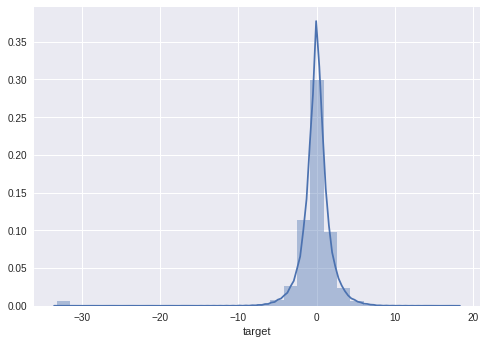

In [0]:
sns.distplot(train_df.target,bins=30)

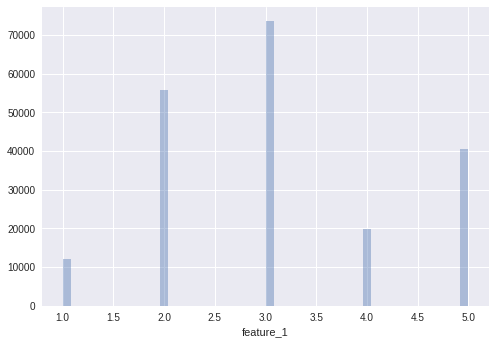

In [0]:
sns.distplot(train_df.feature_1,kde=False)

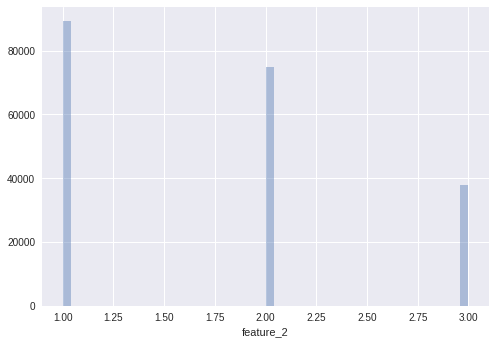

In [0]:
sns.distplot(train_df.feature_2,kde=False)

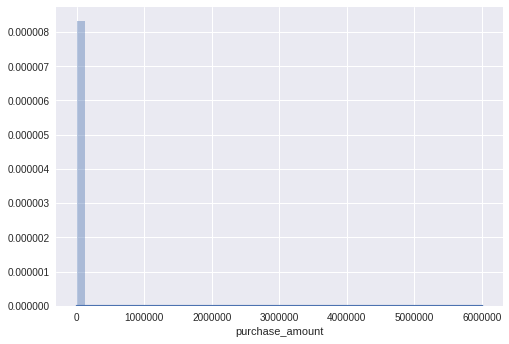

In [0]:
sns.distplot(historicalTransactions.purchase_amount)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


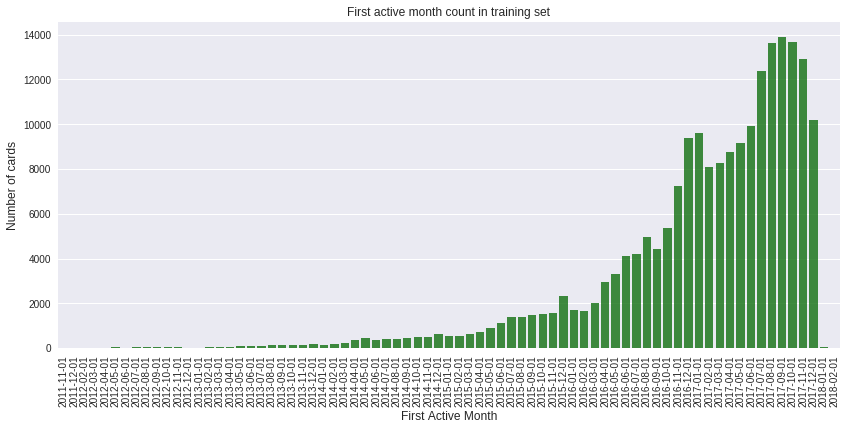

In [0]:
cnt_fam = train_df['first_active_month'].dt.date.value_counts()
cnt_fam = cnt_fam.sort_index()

plt.figure(figsize=(14,6))
sns.barplot(cnt_fam.index,cnt_fam.values, alpha=0.8,color='green')
plt.xticks(rotation='vertical')
plt.xlabel('First Active Month',fontsize=12)
plt.ylabel('Number of cards',fontsize=12)
plt.title('First active month count in training set')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


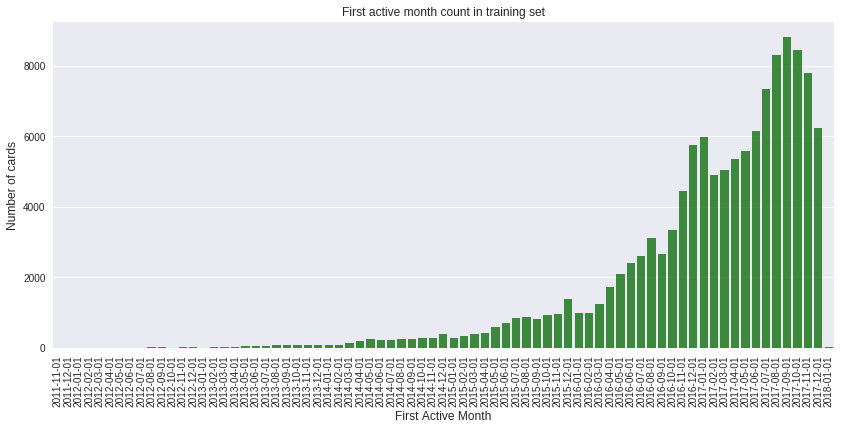

In [0]:
cnt_fam = test_df['first_active_month'].dt.date.value_counts()
cnt_fam = cnt_fam.sort_index()

plt.figure(figsize=(14,6))
sns.barplot(cnt_fam.index,cnt_fam.values, alpha=0.8,color='green')
plt.xticks(rotation='vertical')
plt.xlabel('First Active Month',fontsize=12)
plt.ylabel('Number of cards',fontsize=12)
plt.title('First active month count in training set')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


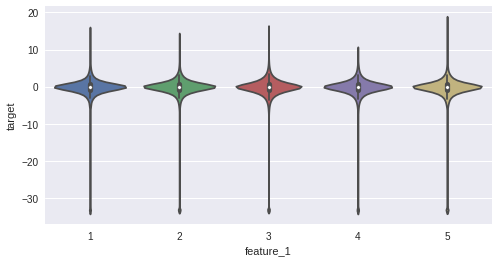

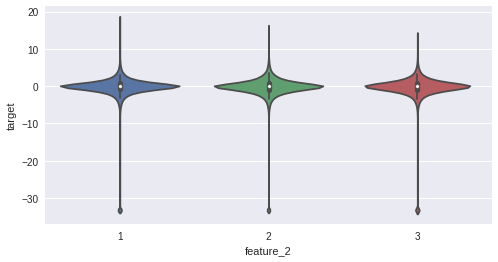

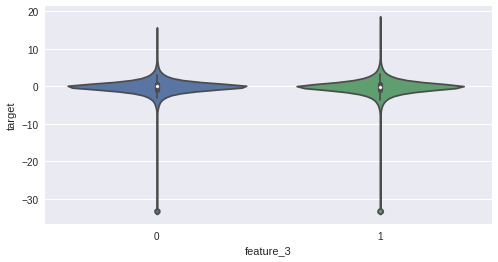

In [0]:
plt.figure(figsize=(8,4))
sns.violinplot(x='feature_1',y='target',data=train_df)
plt.show()
plt.figure(figsize=(8,4))
sns.violinplot(x='feature_2',y='target',data=train_df)
plt.show()
plt.figure(figsize=(8,4))
sns.violinplot(x='feature_3',y='target',data=train_df)
plt.show()

In [0]:
gdf = historicalTransactions.groupby('card_id')
gdf = gdf['purchase_amount'].size().reset_index()
gdf.columns =['card_id','num_hist_transactions']


card_id  num_hist_transactions
0  C_ID_00007093c1                    149
1  C_ID_0001238066                    123
2  C_ID_0001506ef0                     66
3  C_ID_0001793786                    216
4  C_ID_000183fdda                    144
5  C_ID_00024e244b                     70
6  C_ID_0002709b5a                     73
7  C_ID_00027503e2                     42
8  C_ID_000298032a                     30
9  C_ID_0002ba3c2e                     70

In [0]:
#merge
train_df = pd.merge(train_df, gdf, on='card_id',how='left')
test_df = pd.merge(test_df, gdf, on='card_id',how='left')

In [0]:
train_df.head()
test_df.head()

first_active_month          card_id  feature_1  feature_2  feature_3  \
0         2017-04-01  C_ID_0ab67a22ab          3          3          1   
1         2017-01-01  C_ID_130fd0cbdd          2          3          0   
2         2017-08-01  C_ID_b709037bc5          5          1          1   
3         2017-12-01  C_ID_d27d835a9f          2          1          0   
4         2015-12-01  C_ID_2b5e3df5c2          5          1          1   

   num_hist_transactions  
0                     68  
1                     78  
2                     13  
3                     26  
4                    110

In [0]:
test_df['num_hist_transactions'].shape
#train_df['target'].shape

(123623,)

In [0]:
from sklearn import linear_model

lm = linear_model.LinearRegression()

lm.fit(train_df.num_hist_transactions.reshape(201917,1),train_df.target.reshape(201917,1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
pred_target = lm.predict(test_df.num_hist_transactions.reshape(123623,1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [0]:
r2_score(pred_target )

In [0]:
print(lm.score)

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


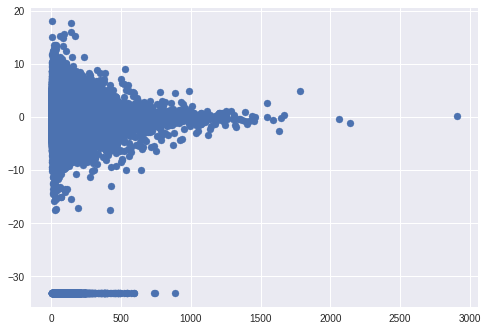

In [0]:
plt.scatter(train_df.num_hist_transactions,train_df.target)

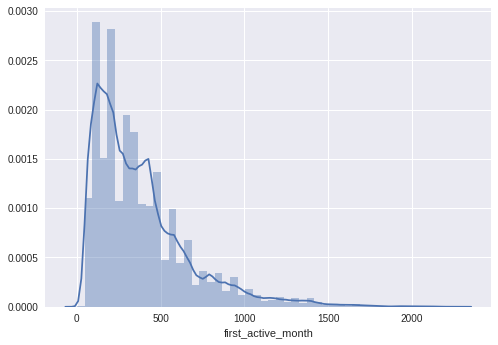

In [0]:
train_df.first_active_month

ref_date = pd.to_datetime('2018-02-01 00:00:00')
ageInDays = (ref_date - train_df.first_active_month).dt.days

ageInDays
sns.distplot(ageInDays)
train_df['account_age'] = ageInDays

In [0]:
max(ageInDays)

2284

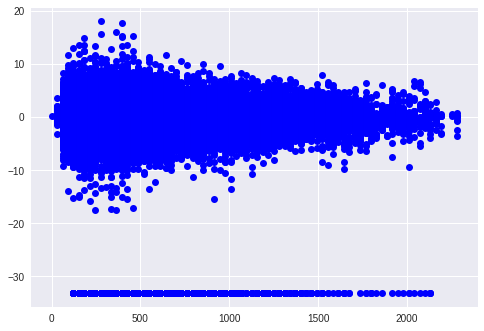

In [0]:
plt.plot(train_df.account_age,train_df.target,'bo')

In [0]:
test_df.head()

first_active_month          card_id  feature_1  feature_2  feature_3  \
0         2017-04-01  C_ID_0ab67a22ab          3          3          1   
1         2017-01-01  C_ID_130fd0cbdd          2          3          0   
2         2017-08-01  C_ID_b709037bc5          5          1          1   
3         2017-12-01  C_ID_d27d835a9f          2          1          0   
4         2015-12-01  C_ID_2b5e3df5c2          5          1          1   

   num_hist_transactions  
0                     68  
1                     78  
2                     13  
3                     26  
4                    110

In [0]:
historicalTransactions[historicalTransactions['card_id']=='C_ID_0ab67a22ab'].shape

(68, 14)

In [0]:
!pip install xlrd

    100% |████████████████████████████████| 112kB 4.6MB/s 


In [0]:
data_dict_train = pd.read_excel('Data_Dictionary.xlsx', sheet_name='train')
data_dict_train

train.csv                                         Unnamed: 1
0                 NaN                                                NaN
1             Columns                                        Description
2             card_id                             Unique card identifier
3  first_active_month                 'YYYY-MM', month of first purchase
4           feature_1                Anonymized card categorical feature
5           feature_2                Anonymized card categorical feature
6           feature_3                Anonymized card categorical feature
7              target  Loyalty numerical score calculated 2 months af...

In [0]:
data_dict_hist = pd.read_excel('Data_Dictionary.xlsx', sheet_name='history')
data_dict_hist.dropna()

historical_transactions.csv  \
1                      Columns   
2                      card_id   
3                    month_lag   
4                purchase_date   
5              authorized_flag   
6                   category_3   
7                 installments   
8                   category_1   
9         merchant_category_id   
10                subsector_id   
11                 merchant_id   
12             purchase_amount   
13                     city_id   
14                    state_id   
15                  category_2   

                                          Unnamed: 1  
1                                        Description  
2                                    Card identifier  
3                        month lag to reference date  
4                                      Purchase date  
5                      Y' if approved, 'N' if denied  
6                                anonymized category  
7                 number of installments of purchase  
8                                anonymized category  
9         Merchant category identifier (anonymized )  
10  Merchant category group identifier (anonymized )  
11                  Merchant identifier (anonymized)  
12                        Normalized purchase amount  
13                     City identifier (anonymized )  
14                    State identifier (anonymized )  
15                               anonymized category

In [0]:
data_dict_merch = pd.read_excel('Data_Dictionary.xlsx', sheet_name='merchant')
data_dict_merch.dropna()

merchants.csv  \
1                       Columns   
2                   merchant_id   
3             merchant_group_id   
4          merchant_category_id   
5                  subsector_id   
6                   numerical_1   
7                   numerical_2   
8                    category_1   
9       most_recent_sales_range   
10  most_recent_purchases_range   
11               avg_sales_lag3   
12           avg_purchases_lag3   
13           active_months_lag3   
14               avg_sales_lag6   
15           avg_purchases_lag6   
16           active_months_lag6   
17              avg_sales_lag12   
18          avg_purchases_lag12   
19          active_months_lag12   
20                   category_4   
21                      city_id   
22                     state_id   
23                   category_2   

                                           Unnamed: 1  
1                                         Description  
2                          Unique merchant identifier  
3                        Merchant group (anonymized )  
4   Unique identifier for merchant category (anony...  
5               Merchant category group (anonymized )  
6                                  anonymized measure  
7                                  anonymized measure  
8                                 anonymized category  
9   Range of revenue (monetary units) in last acti...  
10  Range of quantity of transactions in last acti...  
11  Monthly average of revenue in last 3 months di...  
12  Monthly average of transactions in last 3 mont...  
13     Quantity of active months within last 3 months  
14  Monthly average of revenue in last 6 months di...  
15  Monthly average of transactions in last 6 mont...  
16     Quantity of active months within last 6 months  
17  Monthly average of revenue in last 12 months d...  
18  Monthly average of transactions in last 12 mon...  
19    Quantity of active months within last 12 months  
20                                anonymized category  
21                      City identifier (anonymized )  
22                     State identifier (anonymized )  
23                                anonymized category

In [0]:
merchants_df.head()

merchant_id  merchant_group_id  merchant_category_id  subsector_id  \
0  M_ID_838061e48c               8353                   792             9   
1  M_ID_9339d880ad               3184                   840            20   
2  M_ID_e726bbae1e                447                   690             1   
3  M_ID_a70e9c5f81               5026                   792             9   
4  M_ID_64456c37ce               2228                   222            21   

   numerical_1  numerical_2 category_1 most_recent_sales_range  \
0    -0.057471    -0.057471          N                       E   
1    -0.057471    -0.057471          N                       E   
2    -0.057471    -0.057471          N                       E   
3    -0.057471    -0.057471          Y                       E   
4    -0.057471    -0.057471          Y                       E   

  most_recent_purchases_range  avg_sales_lag3     ...      avg_sales_lag6  \
0                           E           -0.40     ...               -2.25   
1                           E           -0.72     ...               -0.74   
2                           E          -82.13     ...              -82.13   
3                           E             NaN     ...                 NaN   
4                           E             NaN     ...                 NaN   

   avg_purchases_lag6  active_months_lag6  avg_sales_lag12  \
0           18.666667                   6            -2.32   
1            1.291667                   6            -0.57   
2          260.000000                   2           -82.13   
3            4.666667                   6              NaN   
4            0.361111                   6              NaN   

   avg_purchases_lag12  active_months_lag12  category_4  city_id state_id  \
0            13.916667                   12           N      242        9   
1             1.687500                   12           N       22       16   
2           260.000000                    2           N       -1        5   
3             3.833333                   12           Y       -1       -1   
4             0.347222                   12           Y       -1       -1   

   category_2  
0         1.0  
1         1.0  
2         5.0  
3         NaN  
4         NaN  

[5 rows x 22 columns]

In [0]:
merchants_df.describe()

merchant_group_id  merchant_category_id   subsector_id    numerical_1  \
count      334696.000000         334696.000000  334696.000000  334696.000000   
mean        31028.736143            423.131663      25.116404       0.011476   
std         31623.043426            252.898046       9.807371       1.098154   
min             1.000000             -1.000000      -1.000000      -0.057471   
25%          3612.000000            222.000000      19.000000      -0.057471   
50%         19900.000000            373.000000      27.000000      -0.057471   
75%         51707.250000            683.000000      33.000000      -0.047556   
max        112586.000000            891.000000      41.000000     183.735111   

         numerical_2  avg_sales_lag3  avg_purchases_lag3  active_months_lag3  \
count  334696.000000   334683.000000        3.346960e+05       334696.000000   
mean        0.008103       13.832993                 inf            2.994108   
std         1.070497     2395.489999                 NaN            0.095247   
min        -0.057471      -82.130000        3.334953e-01            1.000000   
25%        -0.057471        0.880000        9.236499e-01            3.000000   
50%        -0.057471        1.000000        1.016667e+00            3.000000   
75%        -0.047556        1.160000        1.146522e+00            3.000000   
max       182.079322   851844.640000                 inf            3.000000   

       avg_sales_lag6  avg_purchases_lag6  active_months_lag6  \
count    3.346830e+05        3.346960e+05       334696.000000   
mean     2.165079e+01                 inf            5.947397   
std      3.947108e+03                 NaN            0.394936   
min     -8.213000e+01        1.670447e-01            1.000000   
25%      8.500000e-01        9.022475e-01            6.000000   
50%      1.010000e+00        1.026961e+00            6.000000   
75%      1.230000e+00        1.215575e+00            6.000000   
max      1.513959e+06                 inf            6.000000   

       avg_sales_lag12  avg_purchases_lag12  active_months_lag12  \
count     3.346830e+05         3.346960e+05        334696.000000   
mean      2.522771e+01                  inf            11.599335   
std       5.251842e+03                  NaN             1.520138   
min      -8.213000e+01         9.832954e-02             1.000000   
25%       8.500000e-01         8.983333e-01            12.000000   
50%       1.020000e+00         1.043361e+00            12.000000   
75%       1.290000e+00         1.266480e+00            12.000000   
max       2.567408e+06                  inf            12.000000   

             city_id       state_id     category_2  
count  334696.000000  334696.000000  322809.000000  
mean      102.917926      11.860942       2.380002  
std       107.090673       6.176889       1.562661  
min        -1.000000      -1.000000       1.000000  
25%        -1.000000       9.000000       1.000000  
50%        69.000000       9.000000       2.000000  
75%       182.000000      16.000000       4.000000  
max       347.000000      24.000000       5.000000

In [0]:
full_lm_df.head()

first_active_month          card_id  feature_1  feature_2  feature_3  \
0         2017-06-01  C_ID_92a2005557          5          2          1   
1         2017-01-01  C_ID_3d0044924f          4          1          0   
2         2016-08-01  C_ID_d639edf6cd          2          2          0   
3         2017-09-01  C_ID_186d6a6901          4          3          0   
4         2017-11-01  C_ID_cdbd2c0db2          1          3          0   

     target  
0 -0.820283  
1  0.392913  
2  0.688056  
3  0.142495  
4 -0.159749

In [0]:
full_lm_df = pd.merge(full_lm_df, historicalTransactions, on='card_id',how='left' )

In [0]:
full_lm_target = full_lm_df['target']


In [0]:
full_lm_target.head()

0   -0.820283
1   -0.820283
2   -0.820283
3   -0.820283
4   -0.820283
Name: target, dtype: float64

In [0]:
full_lm_target.shape

(1261516,)

In [0]:
full_lm_df = full_lm_df.drop('target',axis=1)

In [0]:
full_lm_df.shape

NameError: ignored

In [0]:
from sklearn import linear_model

lm = linear_model.LinearRegression()

lm.fit(full_lm_df,full_lm_target.reshape(1261516,1))

In [0]:
full_lm_df_train = train_df
full_lm_df_train = pd.merge(full_lm_df_train, newMerchantsTransactions_df, on='card_id',how='left' )
full_lm_df_train = pd.merge(full_lm_df_train, merchants_df, on='merchant_id',how='left' )

In [0]:
full_lm_df_test = test_df
full_lm_df_test = pd.merge(full_lm_df_test, newMerchantsTransactions_df, on='card_id',how='left' )
full_lm_df_test = pd.merge(full_lm_df_test, merchants_df, on='merchant_id',how='left' )

In [0]:
#Find all columns from a data frame which are int and float

numericColumns = []
for col in full_lm_df.columns:
    if full_lm_df[col].dtype != 'object':
      print(col , full_lm_df[col].dtype)
      numericColumns.append(col)
      
print(numericColumns)
                           

first_active_month datetime64[ns]
feature_1 int64
feature_2 int64
feature_3 int64
target float64
city_id_x float64
installments float64
merchant_category_id_x float64
month_lag float64
purchase_amount float64
category_2_x float64
state_id_x float64
subsector_id_x float64
merchant_group_id float64
merchant_category_id_y float64
subsector_id_y float64
numerical_1 float64
numerical_2 float64
avg_sales_lag3 float64
avg_purchases_lag3 float64
active_months_lag3 float64
avg_sales_lag6 float64
avg_purchases_lag6 float64
active_months_lag6 float64
avg_sales_lag12 float64
avg_purchases_lag12 float64
active_months_lag12 float64
city_id_y float64
state_id_y float64
category_2_y float64
['first_active_month', 'feature_1', 'feature_2', 'feature_3', 'target', 'city_id_x', 'installments', 'merchant_category_id_x', 'month_lag', 'purchase_amount', 'category_2_x', 'state_id_x', 'subsector_id_x', 'merchant_group_id', 'merchant_category_id_y', 'subsector_id_y', 'numerical_1', 'numerical_2', 'avg_sales_lag

In [0]:
numericColumns =['feature_1', 'feature_2', 'feature_3', 
 'installments', 
 'month_lag', 'purchase_amount', 'category_2_x', 'merchant_category_id_y', 
 'subsector_id_y', 'numerical_1', 'numerical_2', 'avg_sales_lag3', 
 'avg_purchases_lag3', 'active_months_lag3', 'avg_sales_lag6', 
 'avg_purchases_lag6', 'active_months_lag6', 'avg_sales_lag12', 'avg_purchases_lag12', 
 'active_months_lag12', 'city_id_y', 'state_id_y', 'category_2_y','target']

In [0]:
all_numeric_full_lm_df_train = full_lm_df_train[numericColumns]

In [0]:
all_numeric_full_lm_df_test = full_lm_df_test[numericColumns]

In [0]:
all_numeric_full_lm_df.head()

feature_1  feature_2  feature_3  installments  month_lag  purchase_amount  \
0          5          2          1           0.0        1.0        -0.491457   
1          5          2          1           0.0        2.0        -0.666561   
2          5          2          1           0.0        1.0        -0.635246   
3          5          2          1           0.0        2.0        -0.581180   
4          5          2          1           0.0        1.0        -0.296112   

   category_2_x  merchant_category_id_y  subsector_id_y  numerical_1  \
0           1.0                    80.0            37.0   183.735111   
1           1.0                    80.0            37.0    -0.057471   
2           1.0                   278.0            37.0    -0.057471   
3           1.0                   842.0            37.0     0.002019   
4           1.0                   783.0            19.0    -0.057471   

     ...     avg_sales_lag6  avg_purchases_lag6  active_months_lag6  \
0    ...               1.25            1.226935                 6.0   
1    ...               0.75            0.821384                 5.0   
2    ...               1.11            1.128812                 6.0   
3    ...               0.96            0.936156                 6.0   
4    ...               0.88            0.914201                 6.0   

   avg_sales_lag12  avg_purchases_lag12  active_months_lag12  city_id_y  \
0             1.29             1.261291                 12.0       -1.0   
1             0.75             0.821384                  5.0       69.0   
2             1.13             1.154878                 12.0       -1.0   
3             0.90             0.879034                 12.0       69.0   
4             0.63             0.676331                 10.0       -1.0   

   state_id_y  category_2_y    target  
0         9.0           1.0 -0.820283  
1         9.0           1.0 -0.820283  
2         9.0           1.0 -0.820283  
3         9.0           1.0 -0.820283  
4         9.0           1.0 -0.820283  

[5 rows x 24 columns]

In [0]:
all_numeric_full_lm_df_train = all_numeric_full_lm_df_train.dropna()

In [0]:
all_numeric_full_lm_df_test = all_numeric_full_lm_df_test.dropna()

In [0]:
full_lm_target = all_numeric_full_lm_df_train['target']

In [0]:
all_numeric_full_lm_df_train = all_numeric_full_lm_df_train.drop('target',axis=1)

In [0]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [0]:
model1 = sm.OLS( full_lm_target, all_numeric_full_lm_df_train )

In [0]:
result = model1.fit()

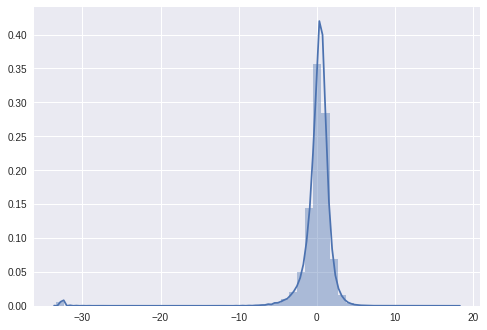

In [0]:
sns.distplot(result.resid)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


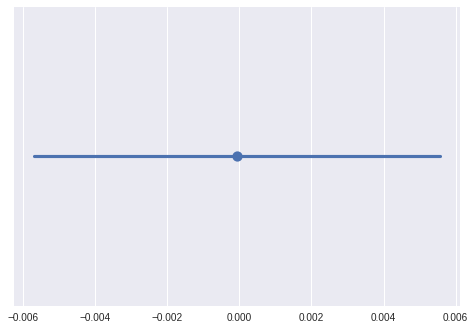

In [0]:
sns.lmplot

In [0]:

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     2125.
Date:                Thu, 13 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:38:33   Log-Likelihood:            -2.6169e+06
No. Observations:             1065526   AIC:                         5.234e+06
Df Residuals:                 1065503   BIC:                         5.234e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
feature_1                 -0

In [0]:
from sklearn import linear_model

lm = linear_model.LinearRegression()

lm.fit(all_numeric_full_lm_df_train,full_lm_target.reshape(1065526,1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
y_pred = lm.predict(all_numeric_full_lm_df_test)

In [0]:
y_pred.shape 

(648811, 1)

In [0]:
all_numeric_full_lm_df_test.shape

(648811, 23)

In [0]:
test_submission = all_numeric_full_lm_df_test

In [0]:
test_submission['target'] = y_pred
test_submission['card_id'] = full_lm_df_test['card_id']

In [0]:
test_submission.head()

feature_1  feature_2  feature_3  installments  month_lag  purchase_amount  \
0          3          3          1           3.0        2.0        -0.383266   
1          3          3          1           1.0        2.0        -0.671775   
2          3          3          1           1.0        2.0        -0.722114   
3          2          3          0           3.0        2.0        -0.506484   
4          2          3          0           1.0        2.0        -0.656749   

   category_2_x  merchant_category_id_y  subsector_id_y  numerical_1  \
0           1.0                    40.0            21.0    -0.027726   
1           1.0                   307.0            19.0    -0.047556   
2           1.0                    80.0            37.0    -0.047556   
3           4.0                   650.0            29.0     3.125214   
4           4.0                   531.0            27.0    -0.057471   

   numerical_2  avg_sales_lag3  avg_purchases_lag3  active_months_lag3  \
0    -0.027726            0.91            0.930636                 3.0   
1    -0.047556            1.32            1.412368                 3.0   
2    -0.047556            1.06            1.025810                 3.0   
3     3.105384            1.13            1.177296                 3.0   
4    -0.057471            0.84            0.868421                 3.0   

   avg_sales_lag6  avg_purchases_lag6  active_months_lag6  avg_sales_lag12  \
0            0.86            0.856455                 6.0             0.87   
1            1.53            1.650679                 6.0             1.64   
2            1.15            1.095325                 6.0             1.19   
3            1.17            1.210831                 6.0             1.20   
4            0.89            0.938596                 6.0             0.92   

   avg_purchases_lag12  active_months_lag12  city_id_y  state_id_y  \
0             0.877649                 12.0      235.0        12.0   
1             1.795852                 12.0       34.0        12.0   
2             1.149075                 12.0       -1.0        12.0   
3             1.213817                 12.0       -1.0        13.0   
4             0.984649                 12.0       -1.0        13.0   

   category_2_y    target          card_id  
0           1.0 -0.696015  C_ID_0ab67a22ab  
1           1.0 -0.644824  C_ID_0ab67a22ab  
2           1.0 -0.626912  C_ID_0ab67a22ab  
3           4.0 -0.505302  C_ID_130fd0cbdd  
4           4.0 -0.472940  C_ID_130fd0cbdd

In [0]:
submit_test = pd.merge(test_submission, sampleSubmission_df, on='card_id',how='right' )

In [0]:
submit_test.head()

feature_1  feature_2  feature_3  installments  month_lag  purchase_amount  \
0        3.0        3.0        1.0           3.0        2.0        -0.383266   
1        3.0        3.0        1.0           1.0        2.0        -0.671775   
2        3.0        3.0        1.0           1.0        2.0        -0.722114   
3        2.0        3.0        0.0           3.0        2.0        -0.506484   
4        2.0        3.0        0.0           1.0        2.0        -0.656749   

   category_2_x  merchant_category_id_y  subsector_id_y  numerical_1  \
0           1.0                    40.0            21.0    -0.027726   
1           1.0                   307.0            19.0    -0.047556   
2           1.0                    80.0            37.0    -0.047556   
3           4.0                   650.0            29.0     3.125214   
4           4.0                   531.0            27.0    -0.057471   

   numerical_2  avg_sales_lag3  avg_purchases_lag3  active_months_lag3  \
0    -0.027726            0.91            0.930636                 3.0   
1    -0.047556            1.32            1.412368                 3.0   
2    -0.047556            1.06            1.025810                 3.0   
3     3.105384            1.13            1.177296                 3.0   
4    -0.057471            0.84            0.868421                 3.0   

   avg_sales_lag6  avg_purchases_lag6  active_months_lag6  avg_sales_lag12  \
0            0.86            0.856455                 6.0             0.87   
1            1.53            1.650679                 6.0             1.64   
2            1.15            1.095325                 6.0             1.19   
3            1.17            1.210831                 6.0             1.20   
4            0.89            0.938596                 6.0             0.92   

   avg_purchases_lag12  active_months_lag12  city_id_y  state_id_y  \
0             0.877649                 12.0      235.0        12.0   
1             1.795852                 12.0       34.0        12.0   
2             1.149075                 12.0       -1.0        12.0   
3             1.213817                 12.0       -1.0        13.0   
4             0.984649                 12.0       -1.0        13.0   

   category_2_y  target_x          card_id  target_y  
0           1.0 -0.696015  C_ID_0ab67a22ab         0  
1           1.0 -0.644824  C_ID_0ab67a22ab         0  
2           1.0 -0.626912  C_ID_0ab67a22ab         0  
3           4.0 -0.505302  C_ID_130fd0cbdd         0  
4           4.0 -0.472940  C_ID_130fd0cbdd         0

In [0]:
submit_test = submit_test[['card_id','target_x']]

In [0]:
submit_test.head()

card_id  target_x
0  C_ID_0ab67a22ab -0.696015
1  C_ID_0ab67a22ab -0.644824
2  C_ID_0ab67a22ab -0.626912
3  C_ID_130fd0cbdd -0.505302
4  C_ID_130fd0cbdd -0.472940

In [0]:
submit_test.to_csv('submission1.csv',index=False)

In [0]:
submit_test.shape

(669174, 2)

In [0]:
!ls -l

total 3050732
-rw-r--r-- 1 root root      17600 Dec 12 16:06 Data_Dictionary.xlsx
---------- 1 root root 2845920484 Nov 23 21:10 historical_transactions.csv
-rw-r--r-- 1 root root         67 Dec 12 16:05 kaggle.json
---------- 1 root root   50040976 Nov 23 21:10 merchants.csv
---------- 1 root root  190246145 Nov 23 21:10 new_merchant_transactions.csv
drwxr-xr-x 1 root root       4096 Dec 10 17:34 sample_data
---------- 1 root root    2225229 Nov 23 21:10 sample_submission.csv
-rw-r--r-- 1 root root   23378507 Dec 12 17:50 submission1.csv
---------- 1 root root    3708740 Nov 23 21:10 test.csv
---------- 1 root root    8383651 Nov 23 21:10 train.csv


In [0]:
from google.colab import files
files.download('submission1.csv') 

In [0]:
sampleSubmission_df.shape

(123623, 2)

In [0]:
all_numeric_full_lm_df_test.head()

feature_1  feature_2  feature_3  installments  month_lag  purchase_amount  \
0          3          3          1           3.0        2.0        -0.383266   
1          3          3          1           1.0        2.0        -0.671775   
2          3          3          1           1.0        2.0        -0.722114   
3          2          3          0           3.0        2.0        -0.506484   
4          2          3          0           1.0        2.0        -0.656749   

   category_2_x  merchant_category_id_y  subsector_id_y  numerical_1  \
0           1.0                    40.0            21.0    -0.027726   
1           1.0                   307.0            19.0    -0.047556   
2           1.0                    80.0            37.0    -0.047556   
3           4.0                   650.0            29.0     3.125214   
4           4.0                   531.0            27.0    -0.057471   

       ...       active_months_lag3  avg_sales_lag6  avg_purchases_lag6  \
0      ...                      3.0            0.86            0.856455   
1      ...                      3.0            1.53            1.650679   
2      ...                      3.0            1.15            1.095325   
3      ...                      3.0            1.17            1.210831   
4      ...                      3.0            0.89            0.938596   

   active_months_lag6  avg_sales_lag12  avg_purchases_lag12  \
0                 6.0             0.87             0.877649   
1                 6.0             1.64             1.795852   
2                 6.0             1.19             1.149075   
3                 6.0             1.20             1.213817   
4                 6.0             0.92             0.984649   

   active_months_lag12  city_id_y  state_id_y  category_2_y  
0                 12.0      235.0        12.0           1.0  
1                 12.0       34.0        12.0           1.0  
2                 12.0       -1.0        12.0           1.0  
3                 12.0       -1.0        13.0           4.0  
4                 12.0       -1.0        13.0           4.0  

[5 rows x 23 columns]

In [0]:
#@title Default title text
#data preprocessing 
#1. find missing values
all_dfs= {'train_df':train_df,'test_df':test_df, 'historicalTransactions':historicalTransactions,
          'newMerchantsTransactions_df':newMerchantsTransactions_df, 'merchants_df':merchants_df}
train_df.isnull().sum()

for name,df in all_dfs.items():
  print(name)
  print(df.isnull().sum()*100/df.shape[0])

train_df
first_active_month    0.0
card_id               0.0
feature_1             0.0
feature_2             0.0
feature_3             0.0
target                0.0
dtype: float64
test_df
first_active_month    0.000809
card_id               0.000000
feature_1             0.000000
feature_2             0.000000
feature_3             0.000000
dtype: float64
historicalTransactions
authorized_flag         0.000000
card_id                 0.000000
city_id                 0.000000
category_1              0.000000
installments            0.000000
category_3              0.611970
merchant_category_id    0.000000
merchant_id             0.475678
month_lag               0.000000
purchase_amount         0.000000
purchase_date           0.000000
category_2              9.112500
state_id                0.000000
subsector_id            0.000000
dtype: float64
newMerchantsTransactions_df
authorized_flag         0.000000
card_id                 0.000000
city_id                 0.000000
category_1     

In [0]:
train_df.values

array([[Timestamp('2017-06-01 00:00:00'), 'C_ID_92a2005557', 5, 2, 1,
        -0.8202826],
       [Timestamp('2017-01-01 00:00:00'), 'C_ID_3d0044924f', 4, 1, 0,
        0.39291325],
       [Timestamp('2016-08-01 00:00:00'), 'C_ID_d639edf6cd', 2, 2, 0,
        0.68805599],
       ...,
       [Timestamp('2017-08-01 00:00:00'), 'C_ID_7666735b3d', 4, 3, 0,
        0.09349415],
       [Timestamp('2016-07-01 00:00:00'), 'C_ID_73f5a0efd0', 3, 2, 1,
        -4.67658938],
       [Timestamp('2017-07-01 00:00:00'), 'C_ID_92c9984c58', 3, 1, 1,
        -1.85941301]], dtype=object)

In [0]:
full_lm_df_train.shape

(1261516, 40)

In [0]:
all_numeric_full_lm_df_train.iloc[:1000,2:]

feature_3  installments  month_lag  purchase_amount  category_2_x  \
0            1           0.0        1.0        -0.491457           1.0   
1            1           0.0        2.0        -0.666561           1.0   
2            1           0.0        1.0        -0.635246           1.0   
3            1           0.0        2.0        -0.581180           1.0   
4            1           0.0        1.0        -0.296112           1.0   
5            1           0.0        1.0        -0.719890           1.0   
6            1           0.0        1.0        -0.559933           1.0   
7            1           0.0        1.0        -0.707223           1.0   
8            1           0.0        2.0        -0.307758           1.0   
9            1           0.0        1.0        -0.596643           1.0   
10           1           0.0        2.0        -0.559076           1.0   
11           1           0.0        1.0        -0.492133           1.0   
12           1           0.0        1.0        -0.523163           1.0   
13           1           0.0        1.0        -0.647748           1.0   
14           1           0.0        1.0        -0.724368           1.0   
15           1           0.0        2.0        -0.706952           1.0   
16           1           0.0        2.0        -0.719860           1.0   
17           1           0.0        1.0        -0.296112           1.0   
18           1           0.0        2.0        -0.487971           1.0   
19           1           0.0        2.0        -0.716855           1.0   
20           1           0.0        2.0        -0.537739           1.0   
21           1           0.0        2.0        -0.569895           1.0   
22           1           0.0        2.0        -0.700326           1.0   
23           0           1.0        1.0        -0.731881           1.0   
24           0           1.0        2.0        -0.715367           1.0   
25           0           1.0        1.0        -0.733384           1.0   
26           0           1.0        1.0        -0.739410           1.0   
27           0           1.0        2.0        -0.701858           1.0   
28           0           1.0        2.0        -0.733835           1.0   
29           0           0.0        2.0        -0.700326           5.0   
..         ...           ...        ...              ...           ...   
970          1           1.0        2.0        -0.714901           1.0   
971          1           1.0        1.0        -0.725149           1.0   
972          1           1.0        1.0        -0.686802           1.0   
973          1           1.0        2.0        -0.732633           1.0   
974          1           1.0        1.0        -0.724368           1.0   
975          1           1.0        1.0        -0.519106           1.0   
976          1           1.0        1.0        -0.660505           1.0   
977          1           1.0        2.0        -0.431351           1.0   
978          0           NaN        NaN              NaN           NaN   
979          1           3.0        2.0         0.353033           4.0   
980          1           1.0        2.0         1.297089           3.0   
981          1           1.0        2.0        -0.460382           4.0   
982          1          10.0        1.0        -0.101053           1.0   
983          1           1.0        2.0        -0.410464           NaN   
984          1          -1.0        2.0         0.319975           4.0   
985          0           0.0        1.0        -0.731881           1.0   
986          0           0.0        1.0        -0.691460           1.0   
987          0           0.0        1.0        -0.727719           1.0   
988          0           0.0        1.0        -0.732422           1.0   
989          0           0.0        2.0        -0.740146           1.0   
990          0           0.0        1.0        -0.729101           1.0   
991          0           0.0        2.0        -0.738358           1.0   
992      

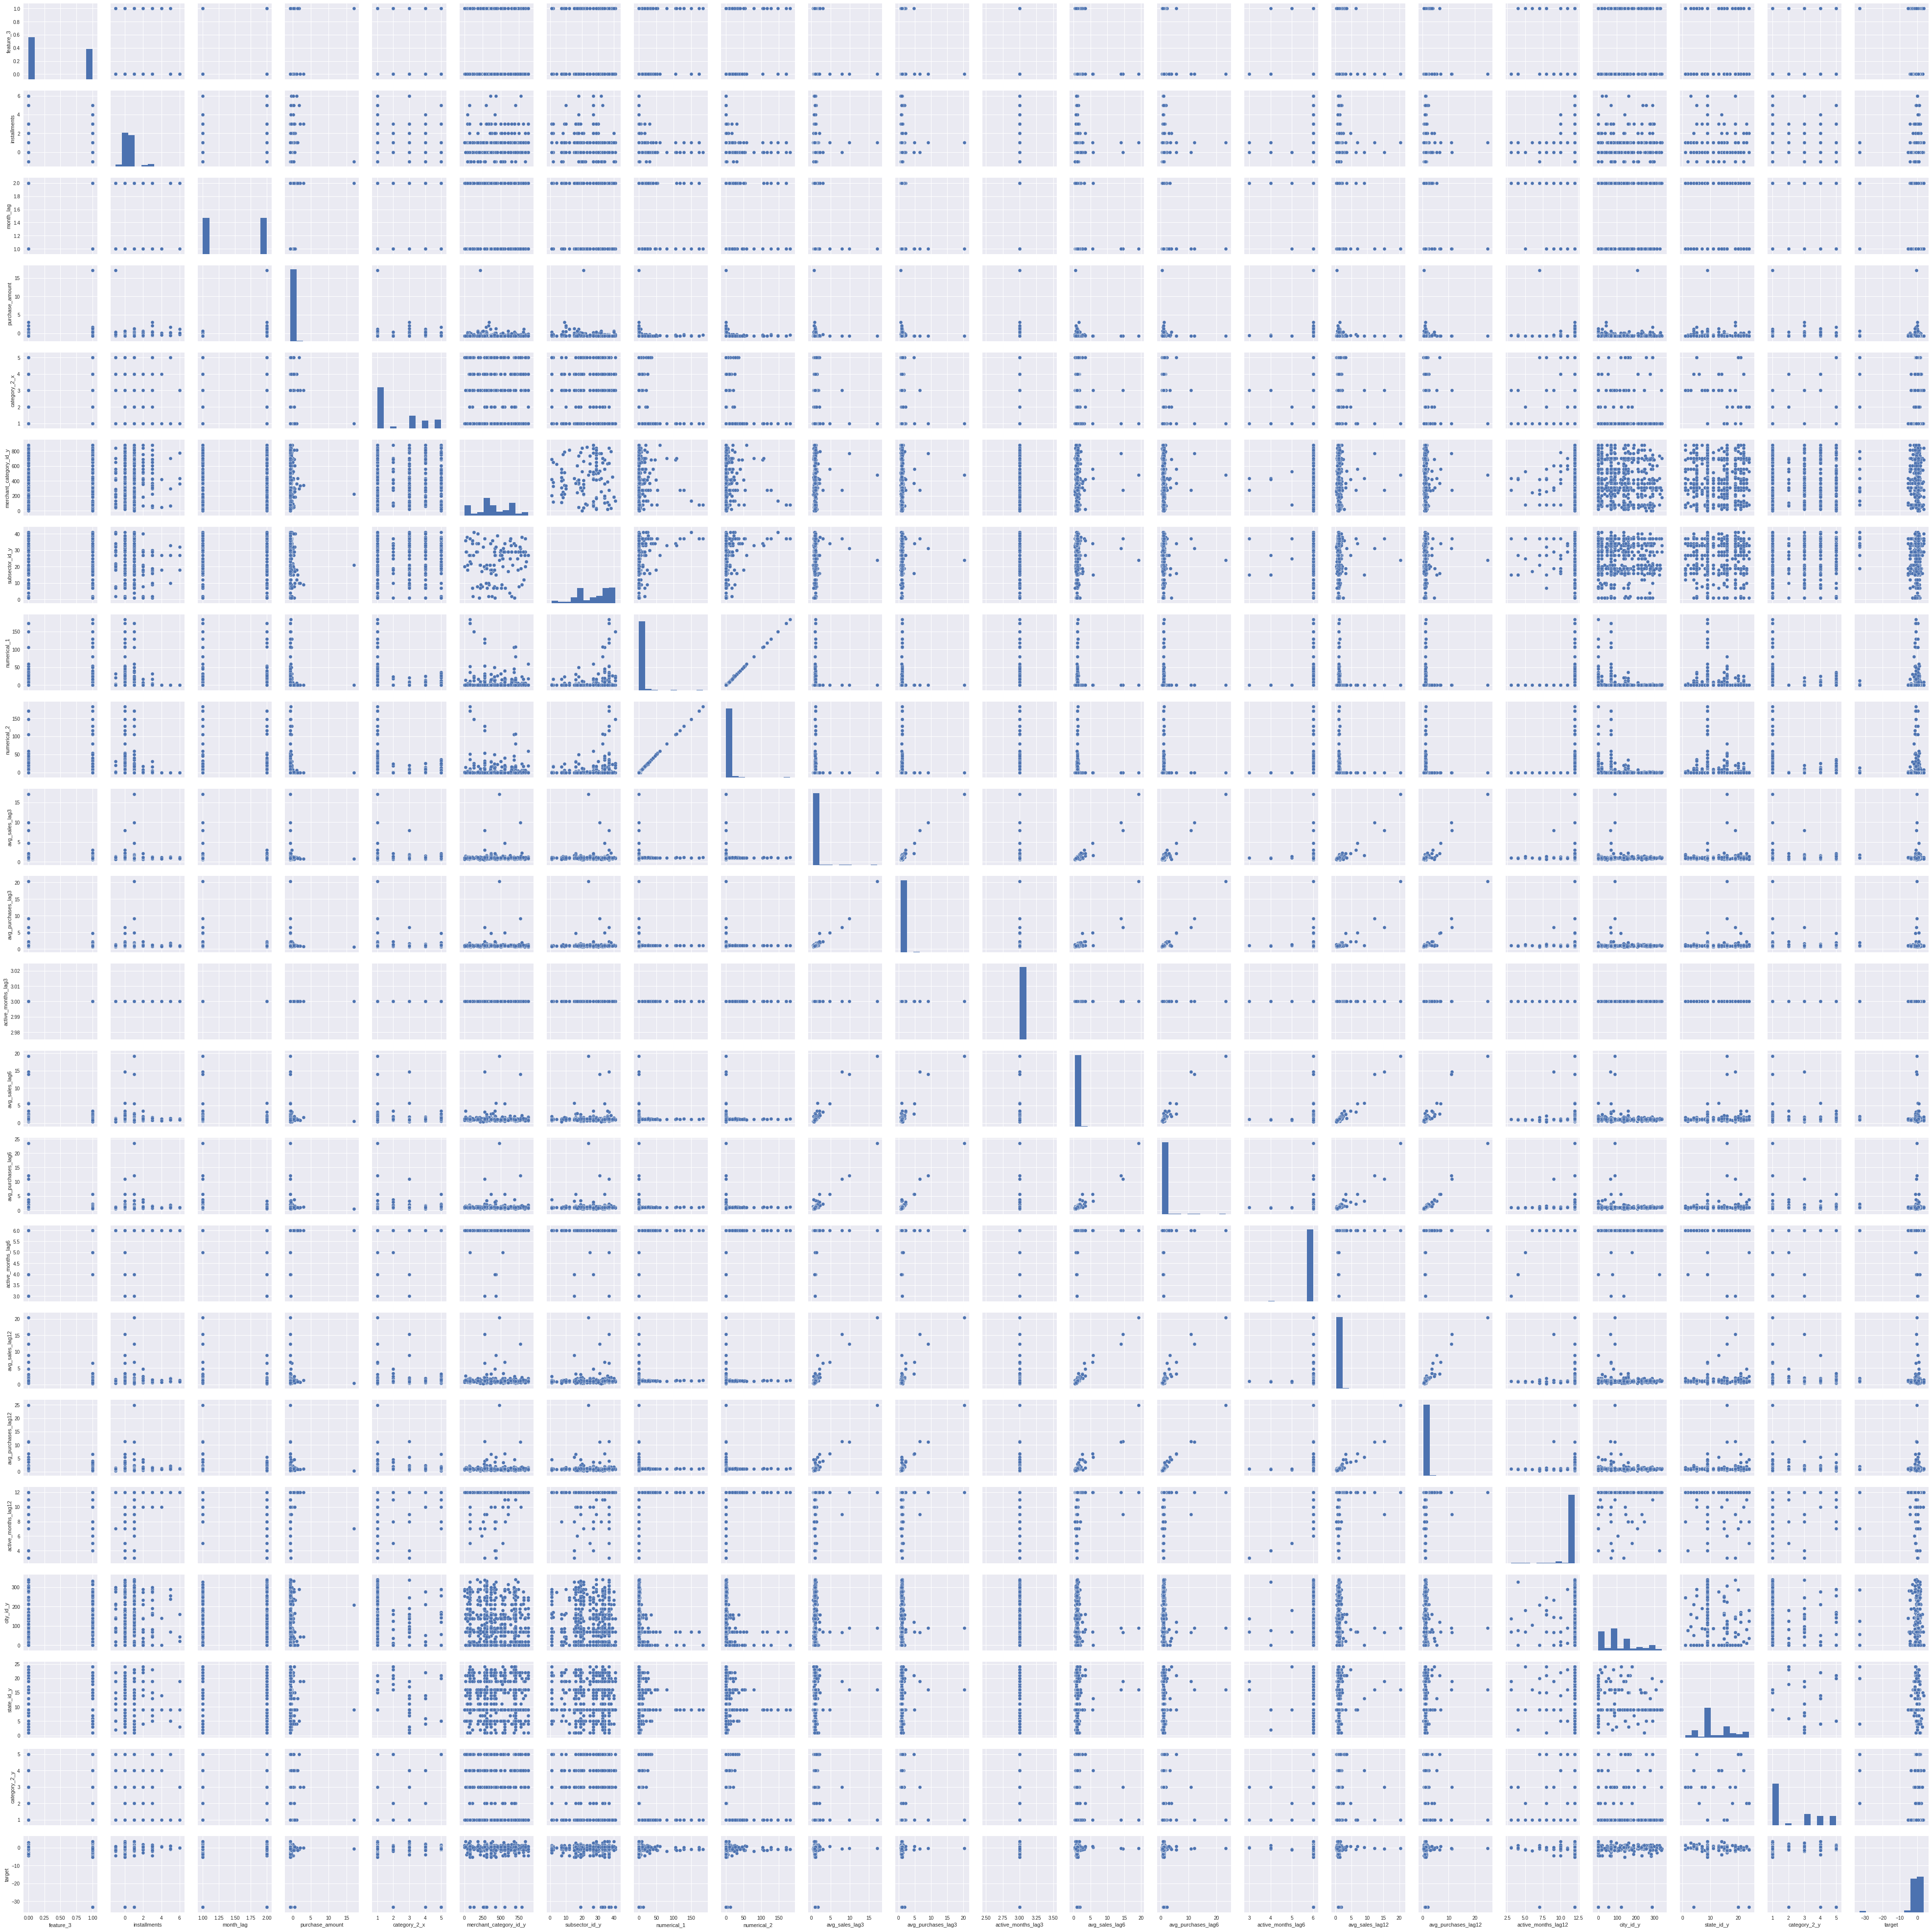

In [0]:
sns.pairplot( all_numeric_full_lm_df_train.iloc[:1000,2:].dropna() )

In [0]:
pd.options.display.max_columns = None
all_numeric_full_lm_df_train.iloc[:1000,2:].dropna().corr()

feature_3  installments  month_lag  purchase_amount  \
feature_3                1.000000     -0.168559   0.046823         0.034649   
installments            -0.168559      1.000000  -0.060509         0.087562   
month_lag                0.046823     -0.060509   1.000000         0.056263   
purchase_amount          0.034649      0.087562   0.056263         1.000000   
category_2_x             0.110613     -0.010615  -0.007727        -0.018915   
merchant_category_id_y  -0.016892      0.048610   0.012030        -0.035412   
subsector_id_y          -0.036891     -0.068958  -0.030457        -0.098562   
numerical_1              0.036966     -0.032361  -0.008731        -0.018137   
numerical_2              0.037680     -0.032011  -0.009419        -0.017837   
avg_sales_lag3          -0.038513      0.008718  -0.061252        -0.026960   
avg_purchases_lag3      -0.030278      0.020354  -0.056341        -0.026699   
active_months_lag3            NaN           NaN        NaN              NaN   
avg_sales_lag6          -0.050455      0.013455  -0.065342        -0.026827   
avg_purchases_lag6      -0.038984      0.028100  -0.062618        -0.020040   
active_months_lag6       0.022638      0.009881  -0.072342         0.002686   
avg_sales_lag12         -0.044802      0.019403  -0.054965        -0.026124   
avg_purchases_lag12     -0.033870      0.032894  -0.057421        -0.020637   
active_months_lag12     -0.016688      0.016859  -0.089684        -0.153698   
city_id_y                0.120935      0.068336  -0.047263         0.041681   
state_id_y              -0.054520     -0.053760  -0.042144        -0.010097   
category_2_y             0.118386     -0.020668  -0.003792        -0.017651   
target                  -0.123807     -0.016140   0.042526        -0.007812   

                        category_2_x  merchant_category_id_y  subsector_id_y  \
feature_3                   0.110613               -0.016892       -0.036891   
installments               -0.010615                0.048610       -0.068958   
month_lag                  -0.007727                0.012030       -0.030457   
purchase_amount            -0.018915               -0.035412       -0.098562   
category_2_x                1.000000               -0.014087        0.029048   
merchant_category_id_y     -0.014087                1.000000       -0.065830   
subsector_id_y              0.029048               -0.065830        1.000000   
numerical_1                -0.110351               -0.073861        0.154848   
numerical_2                -0.109561               -0.073547        0.155844   
avg_sales_lag3             -0.022295                0.013669        0.027745   
avg_purchases_lag3         -0.019147                0.008892        0.009960   
active_months_lag3               NaN                     NaN             NaN   
avg_sales_lag6             -0.005460                0.002882        0.036537   
avg_purchases_lag6         -0.005482                0.005586        0.003880   
active_months_lag6          0.022927                0.011088        0.024399   
avg_sales_lag12            -0.005274               -0.001190        0.049146   
avg_purchases_lag12        -0.002178               -0.002217        0.010652   
active_months_lag12         0.054142                0.006360        0.055657   
city_id_y                   0.011157               -0.014852       -0.041475   
state_id_y                  0.127727               -0.016495        0.026755   
category_2_y                0.979270               -0.006745        0.035280   
target                     -0.163098                0.017748       -0.062109   

                        numerical_1  numerical_2  avg_sales_lag3  \
feature_3                  0.036966     0.037680       -0.038513   
installments              -0.032361    -0.032011        0.008718   
month_lag                 -0.008731    -0.009419       -0.061252   
purchase_amount           -0.018137    -0.017837       -0.026960   
category_2_x             

In [0]:
a1 = historicalTransactions.loc[historicalTransactions['card_id']=='C_ID_92a2005557'][['purchase_date','purchase_amount']]

In [0]:
a1['year']= pd.DatetimeIndex(a1['purchase_date']).year

In [0]:
a1['month']= pd.DatetimeIndex(a1['purchase_date']).month

In [0]:
a1.head()

purchase_date  purchase_amount  year  month
12454872  2017-11-25 16:37:11        -0.506033  2017     11
12454873  2017-07-16 12:21:00        -0.722114  2017      7
12454874  2017-08-10 21:01:16        -0.726171  2017      8
12454875  2017-12-15 12:06:58        -0.610167  2017     12
12454876  2017-07-08 15:13:18        -0.307232  2017      7

In [0]:
gdf = a1.groupby(['year','month'])
gdf = gdf['purchase_amount'].sum().reset_index()
#gdf.columns =['card_id','num_hist_transactions']
gdf['Y_M'] = gdf['year'].astype(str) + '_' + gdf['month'].astype(str)
#apply(lambda  x: ''.join(x),axis=1)
gdf

year  month  purchase_amount      Y_M
0  2017      6        -2.071299   2017_6
1  2017      7       -32.826828   2017_7
2  2017      8       -30.982368   2017_8
3  2017      9       -12.784992   2017_9
4  2017     10       -14.411371  2017_10
5  2017     11       -13.514694  2017_11
6  2017     12       -30.284777  2017_12
7  2018      1       -13.542524   2018_1
8  2018      2       -15.549885   2018_2

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


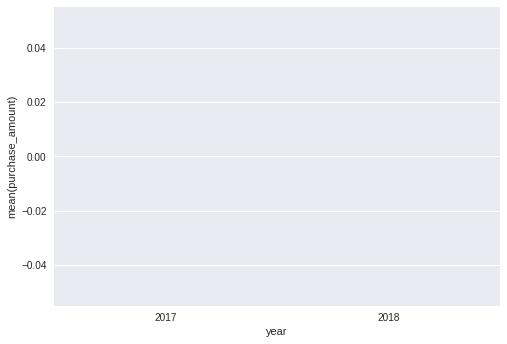

In [0]:
sns.barplot(x='year',y='purchase_amount',data=gdf,order=['2017','2018'])
#df['Year'].astype(str) + df['quarter']

In [0]:
train_df.head()

first_active_month          card_id  feature_1  feature_2  feature_3  \
0         2017-06-01  C_ID_92a2005557          5          2          1   
1         2017-01-01  C_ID_3d0044924f          4          1          0   
2         2016-08-01  C_ID_d639edf6cd          2          2          0   
3         2017-09-01  C_ID_186d6a6901          4          3          0   
4         2017-11-01  C_ID_cdbd2c0db2          1          3          0   

     target  
0 -0.820283  
1  0.392913  
2  0.688056  
3  0.142495  
4 -0.159749

In [0]:
train_df.loc[train_df['card_id']=='C_ID_92a2005557']

first_active_month          card_id  feature_1  feature_2  feature_3  \
0         2017-06-01  C_ID_92a2005557          5          2          1   

     target  
0 -0.820283

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


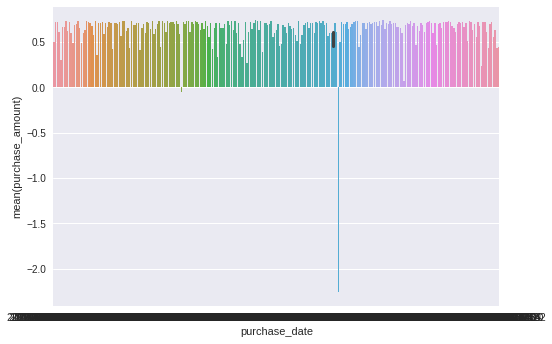

In [0]:
sns.barplot( a1.purchase_date, (-1)*a1.purchase_amount )

In [0]:
%%time
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
first_active_month    201917 non-null datetime64[ns]
card_id               201917 non-null object
feature_1             201917 non-null int64
feature_2             201917 non-null int64
feature_3             201917 non-null int64
target                201917 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 9.2+ MB
CPU times: user 62 ms, sys: 3.82 ms, total: 65.8 ms
Wall time: 68 ms


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


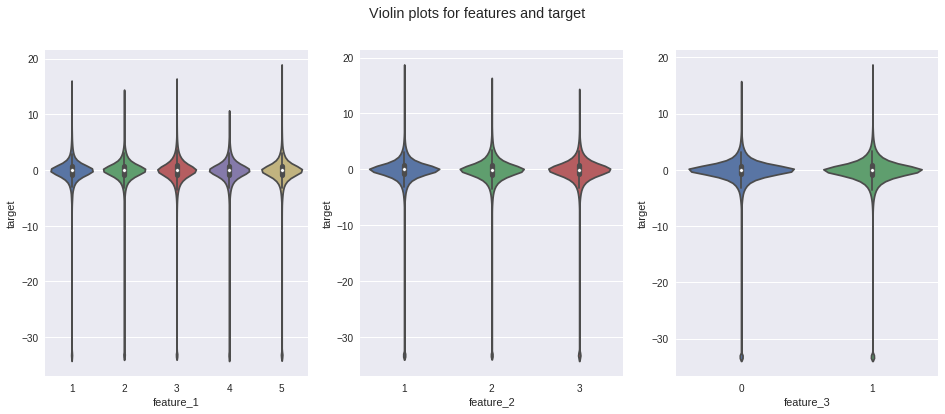

In [0]:
fig, ax = plt.subplots(1,3,figsize=(16,6))
plt.suptitle('Violin plots for features and target')
sns.violinplot(x='feature_1',y='target',data=train_df,ax=ax[0],title='feature_1')
sns.violinplot(x='feature_2',y='target',data=train_df,ax=ax[1],title='feature_2')
sns.violinplot(x='feature_3',y='target',data=train_df,ax=ax[2],title='feature_3')

Text(0.5,0.98,'Counts of categories for features')

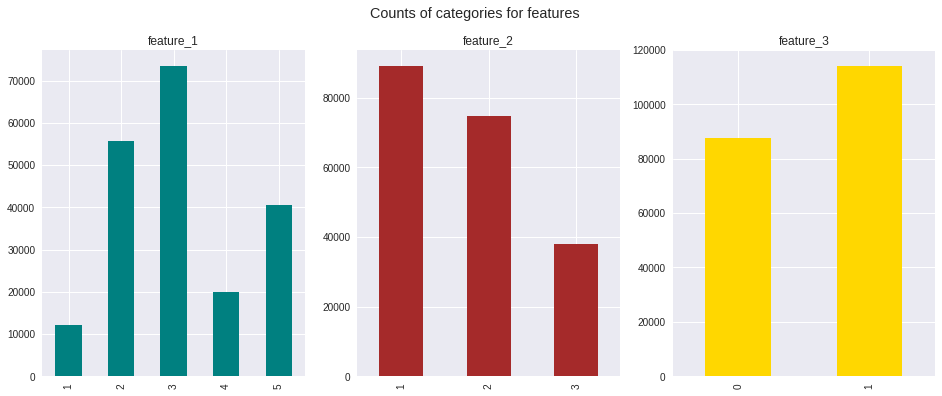

In [0]:
fig,ax = plt.subplots(1,3,figsize=(16,6))
train_df['feature_1'].value_counts().sort_index().plot(kind='bar',ax=ax[0],color='teal',title='feature_1')
train_df['feature_2'].value_counts().sort_index().plot(kind='bar',ax=ax[1],color='brown',title='feature_2')
train_df['feature_3'].value_counts().sort_index().plot(kind='bar',ax=ax[2],color='gold',title='feature_3')
plt.suptitle('Counts of categories for features')

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
import plotly.offline as py
py.init_notebook_mode(connected=False)
import plotly.graph_objs as go
import plotly.tools as tls

configure_plotly_browser_state()

In [0]:
test_df['feature_1'] = test_df['feature_1'].astype('category')
test_df['feature_2'] = test_df['feature_2'].astype('category')
test_df['feature_3'] = test_df['feature_3'].astype('category')

In [0]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
first_active_month    123622 non-null datetime64[ns]
card_id               123623 non-null object
feature_1             123623 non-null category
feature_2             123623 non-null category
feature_3             123623 non-null category
dtypes: category(3), datetime64[ns](1), object(1)
memory usage: 2.2+ MB


In [0]:
d1 = train_df['first_active_month'].value_counts().sort_index()
d2 = test_df['first_active_month'].value_counts().sort_index()

In [0]:
d1.head()

2011-11-01     8
2011-12-01     2
2012-02-01     7
2012-03-01    10
2012-04-01    18
Name: first_active_month, dtype: int64

In [0]:
data = [go.Scatter(x=d1.index, y=d1.values, name='train'), go.Scatter(x=d2.index, y=d2.values, name='test')]

In [0]:
layout = go.Layout(dict(title = "Counts of first active",
                  xaxis = dict(title = 'Month'),
                  yaxis = dict(title = 'Count'),
                  ),legend=dict(
                orientation="v"))

In [0]:
configure_plotly_browser_state()
py.iplot(dict(data=data, layout=layout))

In [0]:
test_df.head()

first_active_month          card_id feature_1 feature_2 feature_3
0         2017-04-01  C_ID_0ab67a22ab         3         3         1
1         2017-01-01  C_ID_130fd0cbdd         2         3         0
2         2017-08-01  C_ID_b709037bc5         5         1         1
3         2017-12-01  C_ID_d27d835a9f         2         1         0
4         2015-12-01  C_ID_2b5e3df5c2         5         1         1

In [0]:
train_df.head()

first_active_month          card_id  feature_1  feature_2  feature_3  \
0         2017-06-01  C_ID_92a2005557          5          2          1   
1         2017-01-01  C_ID_3d0044924f          4          1          0   
2         2016-08-01  C_ID_d639edf6cd          2          2          0   
3         2017-09-01  C_ID_186d6a6901          4          3          0   
4         2017-11-01  C_ID_cdbd2c0db2          1          3          0   

     target  
0 -0.820283  
1  0.392913  
2  0.688056  
3  0.142495  
4 -0.159749

In [0]:
test_df.loc[test_df['first_active_month'].isna(),'first_active_month'] =  test_df.loc[(test_df['feature_1'] == 5) & (test_df['feature_2'] == 2) 
            & (test_df['feature_3'] == 1), 'first_active_month'].min()

Text(0.5,1,'Target Distribution')

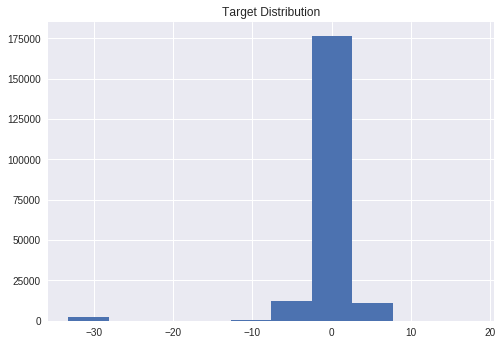

In [0]:
plt.hist(train_df['target'])
plt.title('Target Distribution')

In [0]:
print('There are {0} samples with target lower than -20'.format(train_df.loc[train_df.target < -20].shape[0]))

There are 2207 samples with target lower than -20


In [0]:
train_df.loc[train_df.target < -20]['target'].unique()

array([-33.21928095])

In [0]:
max_date = train_df['first_active_month'].dt.date.max()
def process_main(df):
  date_parts = ['year','weekday','month']
  for part in date_parts:
    part_col = 'first_active_month' + '_' + part
    df[part_col] = getattr(df['first_active_month'].dt,part).astype(int)
   
  df['elapsed_time'] = (max_date - df['first_active_month'].dt.date).dt.days
  return df


In [0]:
train_df = process_main(train_df)
test_df = process_main(test_df)

In [0]:
train_df.head()

first_active_month          card_id  feature_1  feature_2  feature_3  \
0         2017-06-01  C_ID_92a2005557          5          2          1   
1         2017-01-01  C_ID_3d0044924f          4          1          0   
2         2016-08-01  C_ID_d639edf6cd          2          2          0   
3         2017-09-01  C_ID_186d6a6901          4          3          0   
4         2017-11-01  C_ID_cdbd2c0db2          1          3          0   

     target  first_active_month_year  first_active_month_weekday  \
0 -0.820283                     2017                           3   
1  0.392913                     2017                           6   
2  0.688056                     2016                           0   
3  0.142495                     2017                           4   
4 -0.159749                     2017                           2   

   first_active_month_month  elapsed_time  
0                         6           245  
1                         1           396  
2                         8           549  
3                         9           153  
4                        11            92

In [0]:
print(f'{ historicalTransactions.shape[0] } samples in data')

29112361 samples in data


In [0]:
historicalTransactions.head()

authorized_flag          card_id  city_id category_1  installments  \
0               Y  C_ID_4e6213e9bc       88          N             0   
1               Y  C_ID_4e6213e9bc       88          N             0   
2               Y  C_ID_4e6213e9bc       88          N             0   
3               Y  C_ID_4e6213e9bc       88          N             0   
4               Y  C_ID_4e6213e9bc       88          N             0   

  category_3  merchant_category_id      merchant_id  month_lag  \
0          A                    80  M_ID_e020e9b302         -8   
1          A                   367  M_ID_86ec983688         -7   
2          A                    80  M_ID_979ed661fc         -6   
3          A                   560  M_ID_e6d5ae8ea6         -5   
4          A                    80  M_ID_e020e9b302        -11   

   purchase_amount        purchase_date  category_2  state_id  subsector_id  
0        -0.703331  2017-06-25 15:33:07         1.0        16            37  
1        -0.733128  2017-07-15 12:10:45         1.0        16            16  
2        -0.720386  2017-08-09 22:04:29         1.0        16            37  
3        -0.735352  2017-09-02 10:06:26         1.0        16            34  
4        -0.722865  2017-03-10 01:14:19         1.0        16            37

In [5]:
%time
#convert authorized flag to a binary value
historicalTransactions['authorized_flag'] = historicalTransactions['authorized_flag'].apply(
lambda x: 1 if x == 'Y' else 0 )

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


In [0]:
historicalTransactions.head()

NameError: ignored

In [0]:
print(f"At average { historicalTransactions['authorized_flag'].mean() * 100:.4f}% transactions are authorized")

At average 91.3545% transactions are authorized


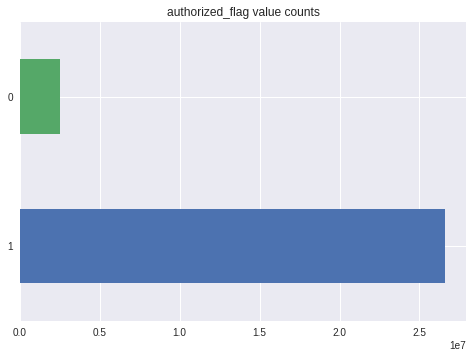

In [0]:
historicalTransactions['authorized_flag'].value_counts().plot(kind='barh',title='authorized_flag value counts')

**Cards with lowest and highest percentage of authorized transactions**

In [11]:
authorized_card_rate = historicalTransactions.groupby(['card_id'])['authorized_flag'].mean().sort_values()
authorized_card_rate.head()

card_id
C_ID_744d26ea32    0.030488
C_ID_bb8dd137c9    0.037037
C_ID_e56202cd39    0.042105
C_ID_4feacff118    0.050000
C_ID_c27b4f80f7    0.054545
Name: authorized_flag, dtype: float64

In [13]:
authorized_card_rate.tail()

card_id
C_ID_d048b7cc60    1.0
C_ID_4e45fcdb43    1.0
C_ID_9f3ee1305e    1.0
C_ID_1b52a3e21b    1.0
C_ID_d3c3d988d5    1.0
Name: authorized_flag, dtype: float64

In [12]:
historicalTransactions['installments'].value_counts()

 0      15411747
 1      11677522
 2        666416
 3        538207
 4        179525
-1        178159
 6        132634
 10       118827
 5        116090
 12        55064
 8         20474
 7         10906
 9          5772
 11          830
 999         188
Name: installments, dtype: int64

In [13]:
historicalTransactions.groupby(['installments'])['authorized_flag'].mean()

installments
-1      0.885692
 0      0.928032
 1      0.907024
 2      0.884020
 3      0.862254
 4      0.819903
 5      0.809183
 6      0.779732
 7      0.693196
 8      0.692439
 9      0.663721
 10     0.702021
 11     0.660241
 12     0.653694
 999    0.031915
Name: authorized_flag, dtype: float64

**On the other hand it seems that 999 could mean fraud transactions, considering only 3% of these transactions were approved. One more interesting thing is that the higher the number of installments is, the lower is the approval rate.**

In [0]:
historicalTransactions['installments'] = historicalTransactions['installments'].astype('category')

In [0]:
historicalTransactions['purchase_date'] = pd.to_datetime(historicalTransactions['purchase_date'])

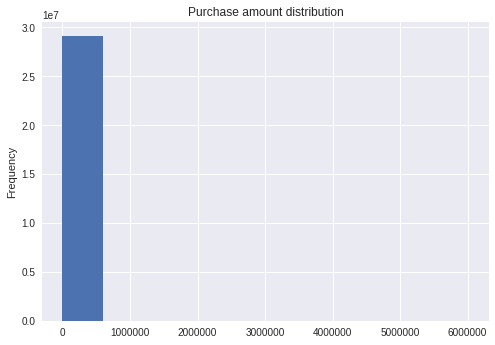

In [16]:
plt.title('Purchase amount distribution')
historicalTransactions['purchase_amount'].plot(kind='hist')

In [19]:
for i in [-1,0]:
  n = historicalTransactions.loc[historicalTransactions['purchase_amount'] < i ].shape[0]
  print(f"there are {n} transactions with purchase amount less than {i}")

there are 0 transactions with purchase amount less than -1
there are 28036884 transactions with purchase amount less than 0


In [22]:
for i in [0,10,100]:
  n = historicalTransactions.loc[historicalTransactions['purchase_amount'] > i ].shape[0]
  print(f"there are {n} transactions with purchase amount more than {i}")

there are 1075467 transactions with purchase amount more than 0
there are 14924 transactions with purchase amount more than 10
there are 1183 transactions with purchase amount more than 100


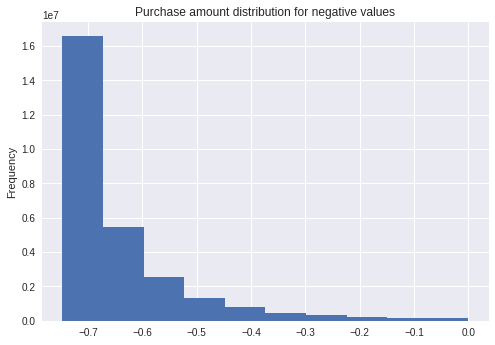

In [23]:
plt.title('Purchase amount distribution for negative values')
historicalTransactions.loc[historicalTransactions['purchase_amount'] <0,'purchase_amount'].plot(kind='hist')

In [26]:
historicalTransactions['category_1'].value_counts()

N    27028332
Y     2084029
Name: category_1, dtype: int64

In [0]:
map_dict = {'Y':0,'N':1}

In [0]:
historicalTransactions['category_1'] = historicalTransactions['category_1'].apply(lambda x: map_dict[x])

In [20]:
historicalTransactions['category_1'].value_counts()

1    27028332
0     2084029
Name: category_1, dtype: int64

In [30]:
historicalTransactions.groupby(['category_1']).agg({'purchase_amount':['mean','std','count'], 'authorized_flag':['mean','std']})

purchase_amount                        authorized_flag          
                      mean          std     count            mean       std
category_1                                                                 
0                -0.419327    22.087594   2084029        0.748578  0.433830
1                 0.071540  1166.016045  27028332        0.926265  0.261339

In [31]:
historicalTransactions.groupby(['category_2']).agg({'purchase_amount':['mean','std','count'], 'authorized_flag':['mean','std']})

purchase_amount                        authorized_flag          
                      mean          std     count            mean       std
category_2                                                                 
1.0               0.149570  1548.714128  15177199        0.927505  0.259306
2.0              -0.165690    89.285770   1026535        0.906225  0.291515
3.0               0.180375   210.616100   3911795        0.918857  0.273055
4.0              -0.158951   141.945606   2618053        0.927634  0.259094
5.0              -0.104457   162.428785   3725915        0.934260  0.247826

In [11]:
historicalTransactions['category_3'].unique()

array([0, 1, 2, 3])

In [10]:
map_dict = {'A': 0, 'B': 1, 'C': 2, 'nan': 3}
historicalTransactions['category_3'] = historicalTransactions['category_3'].apply(lambda x: map_dict[str(x)])
historicalTransactions.groupby(['category_3']).agg({'purchase_amount': ['mean', 'std', 'count'], 'authorized_flag': ['mean', 'std']})

purchase_amount                        authorized_flag          
                      mean          std     count            mean       std
category_3                                                                 
0                 0.361926  1541.485188  15411747        0.928032  0.258436
1                -0.404556   104.062692  11677522        0.907024  0.290399
2                 0.106023    24.047655   1844933        0.836498  0.369824
3                 0.058447     2.191567    178159        0.885692  0.318186

In [26]:
for col in ['city_id', 'merchant_category_id', 'merchant_id', 'state_id', 'subsector_id']:
    print(f"There are {historicalTransactions[col].nunique()} unique values in {col}.")

There are 308 unique values in city_id.
There are 327 unique values in merchant_category_id.
There are 326311 unique values in merchant_id.
There are 25 unique values in state_id.
There are 41 unique values in subsector_id.


**Feature Engineering**

In [0]:
import datetime
def aggregate_historical_transactions(trans, prefix):
    trans['purchase_month'] = trans['purchase_date'].dt.month
    trans['installments'] = trans['installments'].astype(int)
    trans['month_diff'] = ((datetime.datetime.today() - trans['purchase_date']).dt.days)//30
    trans['month_diff'] += trans['month_lag']
    trans.loc[:, 'purchase_date'] = pd.DatetimeIndex(trans['purchase_date']). \
                                        astype(np.int64) * 1e-9
    trans = pd.get_dummies(trans, columns=['category_2', 'category_3'])
    agg_func = {
        'authorized_flag': ['sum', 'mean'],
        'category_1': ['sum', 'mean'],
        'category_2_1.0': ['mean', 'sum'],
        'category_2_2.0': ['mean', 'sum'],
        'category_2_3.0': ['mean', 'sum'],
        'category_2_4.0': ['mean', 'sum'],
        'category_2_5.0': ['mean', 'sum'],
        'category_3_1': ['sum', 'mean'],
        'category_3_2': ['sum', 'mean'],
        'category_3_3': ['sum', 'mean'],
        'merchant_id': ['nunique'],
        'purchase_amount': ['sum', 'mean', 'max', 'min', 'std'],
        'installments': ['sum', 'mean', 'max', 'min', 'std'],
        'purchase_month': ['mean', 'max', 'min', 'std'],
        'purchase_date': [np.ptp, 'max', 'min'],
        'month_lag': ['min', 'max'],
        'merchant_category_id': ['nunique'],
        'state_id': ['nunique'],
        'subsector_id': ['nunique'],
        'city_id': ['nunique'],
    }
    agg_trans = trans.groupby(['card_id']).agg(agg_func)
    agg_trans.columns = [prefix + '_'.join(col).strip() for col in agg_trans.columns.values]
    agg_trans.reset_index(inplace=True)

    df = (trans.groupby('card_id')
          .size()
          .reset_index(name='{}transactions_count'.format(prefix)))

    agg_trans = pd.merge(df, agg_trans, on='card_id', how='left')

    return agg_trans

In [0]:
def aggregate_per_month(history):
    grouped = history.groupby(['card_id', 'month_lag'])
    history['installments'] = history['installments'].astype(int)
    agg_func = {
            'purchase_amount': ['count', 'sum', 'mean', 'min', 'max', 'std'],
            'installments': ['count', 'sum', 'mean', 'min', 'max', 'std'],
            }

    intermediate_group = grouped.agg(agg_func)
    intermediate_group.columns = ['_'.join(col).strip() for col in intermediate_group.columns.values]
    intermediate_group.reset_index(inplace=True)

    final_group = intermediate_group.groupby('card_id').agg(['mean', 'std'])
    final_group.columns = ['_'.join(col).strip() for col in final_group.columns.values]
    final_group.reset_index(inplace=True)
    
    return final_group

In [0]:
final_group = aggregate_per_month(historicalTransactions) 

In [31]:
final_group.head()

card_id  month_lag_mean  month_lag_std  purchase_amount_count_mean  \
0  C_ID_00007093c1       -6.000000       3.894440                   11.461538   
1  C_ID_0001238066       -2.500000       1.870829                   20.500000   
2  C_ID_0001506ef0       -6.230769       4.225988                    5.076923   
3  C_ID_0001793786       -4.500000       3.027650                   21.600000   
4  C_ID_000183fdda       -3.000000       2.160247                   20.571429   

   purchase_amount_count_std  purchase_amount_sum_mean  \
0                   4.701336                 -5.911157   
1                  12.275993                -12.074534   
2                   4.536179                 -2.661683   
3                  13.969809                 -3.678601   
4                   9.198861                 -9.833991   

   purchase_amount_sum_std  purchase_amount_mean_mean  \
0                 2.767303                  -0.507947   
1                 7.033955                  -0.603204   
2                 3.008707                  -0.461749   
3                 4.769788                  -0.042211   
4                 6.162143                  -0.425378   

   purchase_amount_mean_std  purchase_amount_min_mean          ...           \
0                  0.097299                 -0.704152          ...            
1                  0.045861                 -0.730351          ...            
2                  0.259737                 -0.725724          ...            
3                  0.277565                 -0.647028          ...            
4                  0.214361                 -0.687901          ...            

   installments_sum_mean  installments_sum_std  installments_mean_mean  \
0              14.769231              6.431094                1.348480   
1              33.000000             25.226970                1.639345   
2               0.076923              0.277350                0.012821   
3               0.500000              0.849837                0.014621   
4              37.714286             15.445758                1.998522   

   installments_mean_std  installments_min_mean  installments_min_std  \
0               0.357031               1.000000              0.000000   
1               0.395889               0.666667              0.816497   
2               0.046225               0.000000              0.000000   
3               0.024394               0.000000              0.000000   
4               0.553938               0.428571              0.975900   

   installments_max_mean  installments_max_std  installments_std_mean  \
0               2.615385              1.556624               0.625616   
1               4.666667              2.875181               1.246996   
2               0.076923              0.277350               0.034021   
3               0.300000              0.483046               0.065065   
4               8.714286              2.214670               2.173750   

   installments_std_std  
0              0.609378  
1              0.507930  
2              0.117851  
3              0.105721  
4              0.618504  

[5 rows x 27 columns]

In [0]:
history = aggregate_historical_transactions(historicalTransactions, prefix='hist_')